# Problems

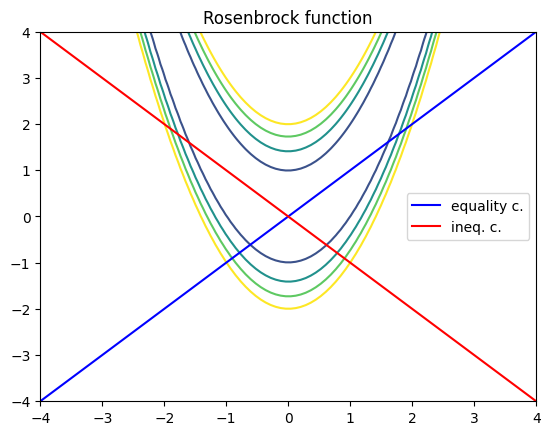

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import casadi as ca

def rosenbrock(x:np.ndarray) -> float: # Rosenbrock function: OF
    return 1*(x[1]-x[0]**2)**2+((x[0]-1)**2)/100

def eq_const(x:np.ndarray) -> float:
    return x[0] - x[1]

def ineq_const(x:np.ndarray) -> float: 
    return x[0] + x[1]

levels = list(np.arange(0, 5, 1))
x, y = np.meshgrid(np.linspace(-4, 4, 100),
                    np.linspace(-4, 4, 100))

fig, ax = plt.subplots(1)
ax.set_title(f"Rosenbrock function")
func = rosenbrock([x, y])
ax.contour(x, y, func, levels)
plt.plot([-4,4], [-4,4], 'b-', label=f"equality c.")
plt.plot([-4,4], [4,-4], 'r-', label=f"ineq. c.")

plt.legend()



PHR augmented Lagrangian.

$$\mathcal{L}_p(x; \lambda, \mu) = f(x) + \frac{\rho}{2} \left( \sum_{i=1}^m \left[ h_i(x) + \frac{\lambda_i}{\rho} \right]^2  + \sum_{i=1}^p \left[ \max(0, g_i(x) + \frac{\lambda_i}{\rho}) \right]^2 \right)  $$

where $\lambda \in \mathbb{R}^m, \mu \in \mathbb{R}_+^{p}$ and $\rho \geq 0$ are penalty coefficient

In [17]:
x = ca.SX.sym('x', 2)
rho = ca.SX.sym('rho', 1)
l = ca.SX.sym('s', 1) #lagrange multipliers for equality constraints
u = ca.SX.sym('u', 1) #lagrange multipliers for inequality constraints

f = rosenbrock(x)
h = eq_const(x)
g = ineq_const(x)

L = f + 0.5*rho*((h + l/rho)**2 + (ca.fmax(0, g + u/rho))**2)

# lagrangian_form = ca.Function('PHR_AugLag', [ca.vertcat(x, rho, l, u)], [L])

nlp = {'x': ca.vertcat(x, rho, l, u), 'f': L}

options = {}
solver = ca.nlpsol('solver', 'ipopt', nlp, options)

In [41]:
# Bound constraints
lbw = [-ca.inf, -ca.inf, 0, -ca.inf, 0]
ubw = [ca.inf, ca.inf, ca.inf, ca.inf, ca.inf]

w0 = [1, 1, 1, 1, 1]

sol = solver(x0=w0, lbx=lbw, ubx=ubw)
sol

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:       14

Total number of variables............................:        5
                     variables with only lower bounds:        2
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

{'f': DM(-6.71087),
 'g': DM([]),
 'lam_g': DM([]),
 'lam_p': DM([]),
 'lam_x': DM([0, 0, -55.7295, 0, -0.453894]),
 'x': DM([0.402898, 0.138797, 0, -6.14838e-05, 4.05463e-06])}

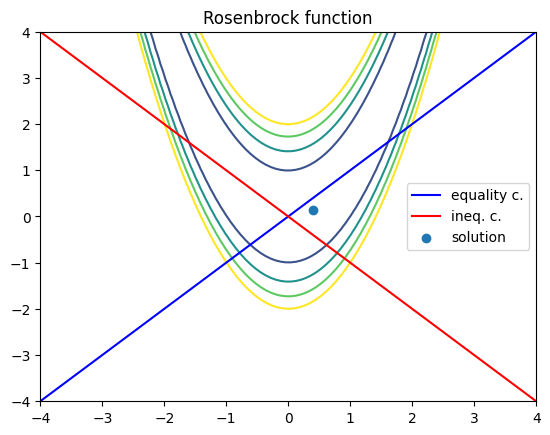

In [40]:
fig, ax = plt.subplots(1)
ax.set_title(f"Rosenbrock function")
func = rosenbrock([x, y])
ax.contour(x, y, func, levels)
plt.plot([-4,4], [-4,4], 'b-', label=f"equality c.")
plt.plot([-4,4], [4,-4], 'r-', label=f"ineq. c.")
plt.scatter([sol['x'][0].full()], [sol['x'][1].full()], label=f"solution")

plt.legend()